# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [62]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [84]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 
                             'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

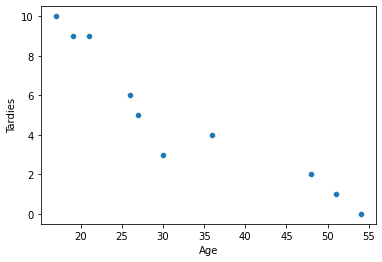

In [85]:
# Your code here.
sns.scatterplot(data=student_data,x='Age',y='Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [65]:
# Your response here. 
# Age seems to have a negative effect on the amount of times that homework is handed in too late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [66]:
# Your response here.
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [67]:
student_data.cov()
# The coveriance and correlation show the same information but the difference is that correlation shows 
# a standardized output between -1 and 1. While output of the covariance depends on the unit measurements of the variables

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [123]:
# Your response here.

# The outcome variable is going to be the amount of times student will be late based on his age.

# we assume a linear relation so we are going to use a linear regression model.
x = student_data.iloc[:, 0].values.reshape(-1, 1) 
y = student_data.iloc[:, 1].values.reshape(-1, 1) 

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(x, y)

y_pred = linear_regressor.predict(x)

student_data['predictions'] = y_pred

Plot your regression model on your scatter plot.

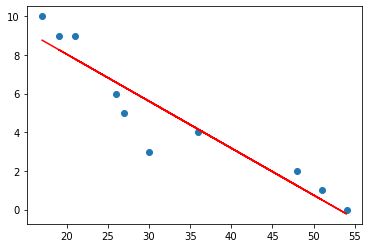

In [124]:
plt.scatter(x, y)
plt.plot(x, student_data['predictions'], color='red')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [132]:
# Your response here. 
from sklearn.metrics import r2_score
print('The r-squared score of our model is:', r2_score(student_data['Tardies'], student_data['predictions']))

"""The model has an R-squared of 0.88 score. Which indicates that 88% of the variance of 
tardiness is explained by the model that we have which is based on the predictor variable age. So this is a good fit"""

The r-squared score of our model is: 0.8820265558250109


'The model has an R-squared of 0.88 score. Which indicates that 88% of the variance of \ntardiness is explained by the model that we have which is based on the predictor variable age. So this is a good fit'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [217]:
# Import any libraries you may need 

In [218]:
# Import the data
df = pd.read_csv('../data/vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [219]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [220]:
# Your response here. 
df[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']].corrwith(df['CO2 Emission Grams/Mile']).sort_values(ascending=False)

Fuel Barrels/Year    0.986189
Fuel Cost/Year       0.930865
Cylinders            0.752393
Year                -0.222300
Combined MPG        -0.926229
dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [221]:
# Your response here. 
x = df[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile']

model = sm.OLS(y,x)

results = model.fit() 

predictions = results.predict(x)

print('The r-squared score of our model is:', r2_score(y, predictions))

The r-squared score of our model is: 0.9800347984321203


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [222]:
# Your response here. 

print('''the R - squared of 0.99 indicates the model fits very well with the data 

The yearly fuel consumptions has the highest impact on the Co2 exhaust. Seems to predict very well in my opinion most 
of prediction values are not independent from eachother. 
   
For example fuel costs. The more fuel you use the higher the costs. I think that a model with only the yearly fuel consumption 
would already be a good model''')

results.summary()

the R - squared of 0.99 indicates the model fits very well with the data 

The yearly fuel consumptions has the highest impact on the Co2 exhaust. Seems to predict very well in my opinion most 
of prediction values are not independent from eachother. 
   
For example fuel costs. The more fuel you use the higher the costs. I think that a model with only the yearly fuel consumption 
would already be a good model


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Sun, 25 Oct 2020   Prob (F-statistic):                        0.00
Time:                             13:25:04   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [164]:
x = df[['Fuel Barrels/Year']]
y = df['CO2 Emission Grams/Mile']

model = sm.OLS(y,x)

results = model.fit() 

predictions = results.predict(x)

print('The r-squared score of our model is:', r2_score(y, predictions))

The r-squared score of our model is: 0.9719029994589994


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [248]:
# Your code here. 
df = pd.DataFrame({'invited': [1,3,4,6,8,9,11,14],
                   'shows' : [1,2,4,4,5,7,8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

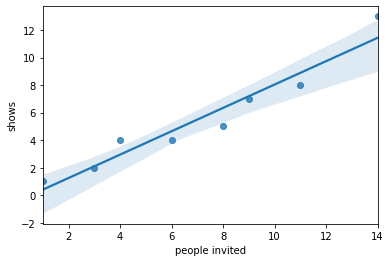

In [249]:
# Your code here.
x = df['invited']
y = df['shows'] 
sns.regplot(x='invited', y='shows',data=df)
plt.xlabel('people invited')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [250]:
# Your response here. 
'''
It seems that the data is linear however The relationship that we would like to see cannot bee seen in this graph. At the moment it shows 
the more people you invite the more will show up'''

y = df['shows'] 
x = df['invited']
model = sm.OLS(y,x)

results = model.fit() 
results.summary()

c:\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  shows   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                    4.20e-07
Time:                        13:48:50   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
invited        0.8015      0.045     17.895      0.000       0.696       0.907
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                           0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

I create a additional variable with no shows which i am going to rergress against invites


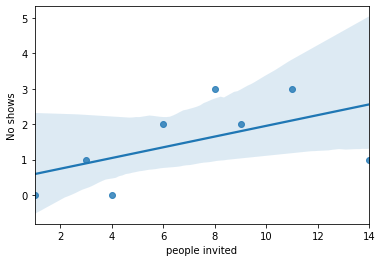

I don't like the last data point that I have only 1 no show when I invite 14 people


In [251]:
print("""I create a additional variable with no shows which i am going to regress against invites""")

df['show_ratio'] = df['shows'] / df['invited']
df['no_shows'] =  df['invited'] - df['shows']


sns.regplot(x='invited', y='no_shows',data=df)
plt.xlabel('people invited')

plt.ylabel('No shows')

plt.show()

print("""I don't like the last data point that I have only 1 no show when I invite 14 people""")

In [256]:
model = sm.OLS(df['no_shows'],df['invited'])

results = model.fit() 
results.summary()

c:\python38\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               no_shows   R-squared (uncentered):                   0.737
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              19.63
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                     0.00304
Time:                        13:54:32   Log-Likelihood:                         -11.017
No. Observations:                   8   AIC:                                      24.03
Df Residuals:                       7   BIC:                                      24.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
invited        0.1985      0.045      4.431      0.003       0.093       0.304
==============================================================================
Omnibus:                        1.458   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.482   Jarque-Bera (JB):                0.655
Skew:                          -0.664   Prob(JB):                        0.721
Kurtosis:                       2.547   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [257]:
# Your response here. 
df2 = df.loc[~df['invited'].isin([14])]
x = df2['invited']
y = df2['no_shows'] 
model = sm.OLS(y,x)

results = model.fit() 
results.summary()

c:\python38\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               no_shows   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              64.29
Date:                Sun, 25 Oct 2020   Prob (F-statistic):                    0.000201
Time:                        13:54:47   Log-Likelihood:                         -6.0445
No. Observations:                   7   AIC:                                      14.09
Df Residuals:                       6   BIC:                                      14.03
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
invited        0.2744      0.034      8.018      0.000       0.191       0.358
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.588
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.199
Skew:                          -0.282   Prob(JB):                        0.905
Kurtosis:                       2.395   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [258]:
print('By removing the last data point the R-squared of my model improved from 0.73 to 0.915')

By removing the last data point the R-squared of my model improved from 0.73 to 0.915
